Dans ce notebook on regarde l'évolution de $KKL_{\alpha}(\hat{p},\hat{q})$ lorsque que le nombre $n = m$ de point issus de $p$ et de $q$ augmentent. On fait varier plusieurs paramètres tels que $\alpha$, $d$, la dimension des points ou $\sigma$ ?

In [16]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import scipy.optimize as sco 

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.generate_y as gy 

import cProfile

# Pour différents $\alpha$, $d=2$, $\sigma$ fixe, p,q gaussian.

In [17]:
alpha = 0.1

## KERNEL ###
sigma = 2
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y, sigma)


#parameters of p and q
mux = np.array([10,10])
Mux = np.array([1/k *mux for k in range(1,17)])
Lx = np.array([[1/2,1/3],[1/4,-2]])
Sigmax = Lx @ Lx.transpose()
muy = np.array([0,0])
Ly = np.array([[1/5, -1],[1/2,1/2]])
Sigmay = Ly @ Ly.transpose() 


C:\Users\cleme\AppData\Local\Temp\ipykernel_20556\1631166234.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  F[i] = J(x,y)


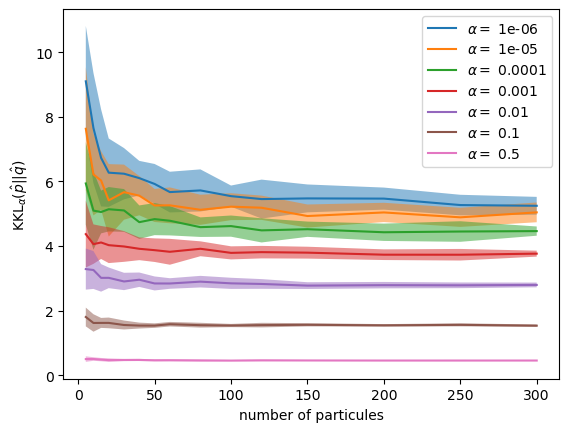

In [18]:
N = [5,10,15,20,30,40,50,60,80,100,120,150,200,250,300]#,400,500]#,600,700,800,900]#,1000,1100,1300,1400,1500,1600,1800,2000]
nb_it = 20 #nombre de calcul de KKL pour un même n  
#fig, axs = plt.subplots(3, 4, figsize=(20,20))
for alpha in [1e-6,1e-5,0.0001,0.001,0.01,0.1,0.5]:
    KKL_n = np.zeros(len(N))
    I_KKL_n = np.zeros(len(N))
    for j in range(len(N)):
        F = np.zeros(nb_it)
        for i in range(nb_it):
            y = gy.gaussian(muy,Sigmay,N[j]) #gy.mixt_gauss(gy.MU,[np.identity(2),np.identity(2)], [1/2,1/2], N[j])
            x = gy.gaussian(1/5 *mux,Sigmax,N[j])

            Ky = 1/N[j] * k(y,y) 
            Ly,V = np.linalg.eig(Ky)
            V = V.transpose()
            Ly = np.real(Ly)
            Packy = [Ky,Ly,V]

            J = lambda x,y : dv.KKL(x, y,k,Packy,alpha) 
            F[i] = J(x,y)
        KKL_n[j] = np.mean(F)
        I_KKL_n[j] = np.std(F)

        #KKL_inv_n.append(J(y,x))

        #axs[j//4,j%4].scatter(x[:,0],x[:,1])
        #axs[j//4,j%4].scatter(y[:,0],y[:,1])


    #plt.figure()
    plt.plot(N,KKL_n,label = r"$\alpha =$ " + str(alpha))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.5)
    #plt.plot(np.linspace(0,150,100), 0.2/ np.sqrt(np.linspace(0,150,100))+ 1.54)
    #plt.title("Evolution of " + r"$KKL_{\alpha}$" + " for sets of points from two gaussians distribution and mixture of gaussian \nwith increasing number of particules " + r"$n$." + " Parameters : " + r"$\sigma =$ " + str(sigma)  ,fontsize = 16)
    plt.xlabel('number of particules')
    plt.ylabel(r'KKL$_{\alpha}(\hat{p}||\hat{q})$')
    plt.legend()

# Pour différents $\alpha$, $d=10$, $\sigma$ fixe, p,q gaussian.

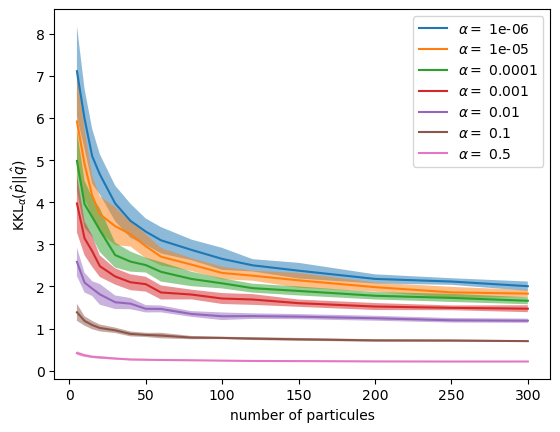

In [19]:
alpha = 0.1
d=10

## KERNEL ###
sigma = 10
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y, sigma)


#parameters of p and q
mux = 2*np.ones(d)
Lx = np.random.randn(d,d)
Sigmax = Lx @ Lx.transpose()
muy = np.zeros(d)
Ly = np.random.randn(d,d)
Sigmay = Ly @ Ly.transpose() #Lx @ Lx.transpose()

N = [5,10,15,20,30,40,50,60,80,100,120,150,200,250,300]#,400,500]#,600,700,800,900]#,1000,1100,1300,1400,1500,1600,1800,2000]
nb_it = 20 #nombre de calcul de KKL pour un même n  
#fig, axs = plt.subplots(3, 4, figsize=(20,20))
for alpha in [1e-6,1e-5,0.0001,0.001,0.01,0.1,0.5]:
    KKL_n = np.zeros(len(N))
    I_KKL_n = np.zeros(len(N))
    for j in range(len(N)):
        F = np.zeros(nb_it)
        for i in range(nb_it):
            y = gy.gaussian(muy,Sigmay,N[j]) #gy.mixt_gauss(gy.MU,[np.identity(2),np.identity(2)], [1/2,1/2], N[j])
            x = gy.gaussian(1/5 *mux,Sigmax,N[j])

            Ky = 1/N[j] * k(y,y) 
            Ly,V = np.linalg.eig(Ky)
            V = V.transpose()
            Ly = np.real(Ly)
            Packy = [Ky,Ly,V]

            J = lambda x,y : dv.KKL(x, y,k,Packy,alpha) 
            F[i] = J(x,y)
        KKL_n[j] = np.mean(F)
        I_KKL_n[j] = np.std(F)

        #KKL_inv_n.append(J(y,x))

        #axs[j//4,j%4].scatter(x[:,0],x[:,1])
        #axs[j//4,j%4].scatter(y[:,0],y[:,1])


    #plt.figure()
    plt.plot(N,KKL_n,label = r"$\alpha =$ " + str(alpha))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.5)
    #plt.plot(np.linspace(0,150,100), 0.2/ np.sqrt(np.linspace(0,150,100))+ 1.54)
    #plt.title("Evolution of " + r"$KKL_{\alpha}$" + " for sets of points from two gaussians distribution and mixture of gaussian \nwith increasing number of particules " + r"$n$." + " Parameters : " + r"$\sigma =$ " + str(sigma)  ,fontsize = 16)
    plt.xlabel('number of particules')
    plt.ylabel(r'KKL$_{\alpha}(\hat{p}||\hat{q})$')
    plt.legend()


# Pour différents $d$, $\alpha$ fixe et $\sigma$ scott rule.

In [20]:
alpha = 0.01

In [21]:
N = [5,10,15,20,30,40,50,60,80,100]#,120,150]#,200,300,400,500]#,600,700,800,900]#,1000,1100,1300,1400,1500,1600,1800,2000]
nb_it = 100 #nombre de calcul de KKL pour un même n  

for d in [2,3,4,5,10,20]:
    
    mux = np.zeros(d)
    Lx = np.random.randn(d,d)
    Sigmax = Lx @ Lx.T
    
    muy = np.ones(d)
    Ly = np.random.randn(d,d)
    Sigmay = Ly @ Ly.T
    
    KKL_n = np.zeros(len(N))
    I_KKL_n = np.zeros(len(N))
    
    for j in range(len(N)):
        F = np.zeros(nb_it) 
        for i in range(nb_it):
            y = gy.gaussian(muy,Sigmay,N[j]) 
            x = gy.gaussian(mux,Sigmax,N[j])
            
            sigma = 
            k = lambda x,y :  kl.k_gauss(x,y,sigma)
            dk = lambda x,y : kl.dk_gauss(x, y, sigma)
    

            Ky = 1/N[j] * k(y,y) 
            Ly,V = np.linalg.eig(Ky)
            V = V.transpose()
            Ly = np.real(Ly)
            Packy = [Ky,Ly,V]

            J = lambda x,y : dv.KKL(x, y,k,Packy,alpha) 
            F[i] = J(x,y)
        KKL_n[j] = np.mean(F)
        I_KKL_n[j] = np.std(F)

    plt.plot(N,KKL_n,label = r"$d =$ " + str(d))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.5)
    plt.title("Evolution of " + r"$KKL_{\alpha}$" + " for sets of points from 2 gaussians distribution with increasing number \n of particules " + r"$n$." + " Parameters : " + r"$\sigma = $ " + str(sigma) + r" $\alpha$" + str(alpha)  ,fontsize = 16)
    plt.xlabel('number of particules')
    plt.ylabel(r'$KKL_{\alpha}$')
    plt.legend()

SyntaxError: invalid syntax (45861591.py, line 23)